In [ ]:
install.packages("FactoMineR")
install.packages("factoextra")
install.packages("scatterPlotMatrix")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘cowplot’, ‘Deriv’, ‘microbenchmark’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘lazyeval’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘crosstalk’, ‘estimability’, ‘numDeriv’, ‘mvtnorm’, ‘car’, ‘DT’, ‘ellipse’, ‘emmeans’, ‘flashClust’, ‘leaps’, ‘multcompView’, ‘scatterplot3d’, ‘ggrepel’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘corrplot’, ‘viridis’, ‘ggsci’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘plyr’, ‘dendextend’, ‘ggpubr’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(FactoMineR)
library(factoextra)
library(scatterPlotMatrix)
library(ggplot2)

Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [ ]:
data <- read.table("/content/cigarettes.dat", sep = "", header = TRUE)
head(data)

,Brand,Tar,Nicotine,Weight,CO
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,Alpine,14.1,0.86,0.9853,13.6
2,Benson&Hedges,16.0,1.06,1.0938,16.6
3,BullDurham,29.8,2.03,1.1650,23.5
4,CamelLights,8.0,0.67,0.9280,10.2
5,Carlton,4.1,0.40,0.9462,5.4
6,Chesterfield,15.0,1.04,0.8885,15.0


## Описание данных
Масса и содержание смол, никотина и угарного газа для 25 марок сигарет.

### Переменные:
* Brand 	Фирма сигарет
* Tar 	Содержание смол в мг
* Nicotine 	Содержание никотина в мг
* Weight 	Масса в мг
* CO 	Содержание угарного газа в мг

In [ ]:
scatterPlotMatrix(data, corrPlotType = "AbsText")

HTML widgets cannot be represented in plain text (need html)

# АГК

### Собственные числа и процент объясняемой вариации

In [ ]:
pca <- FactoMineR::PCA(data[-1])
pca$eig

,eigenvalue,percentage of variance,cumulative percentage of variance
comp 1,3.22417735,80.6044337,80.60443
comp 2,0.68347228,17.0868070,97.69124
comp 3,0.07535584,1.8838961,99.57514
comp 4,0.01699453,0.4248633,100.00000


### Scree plot

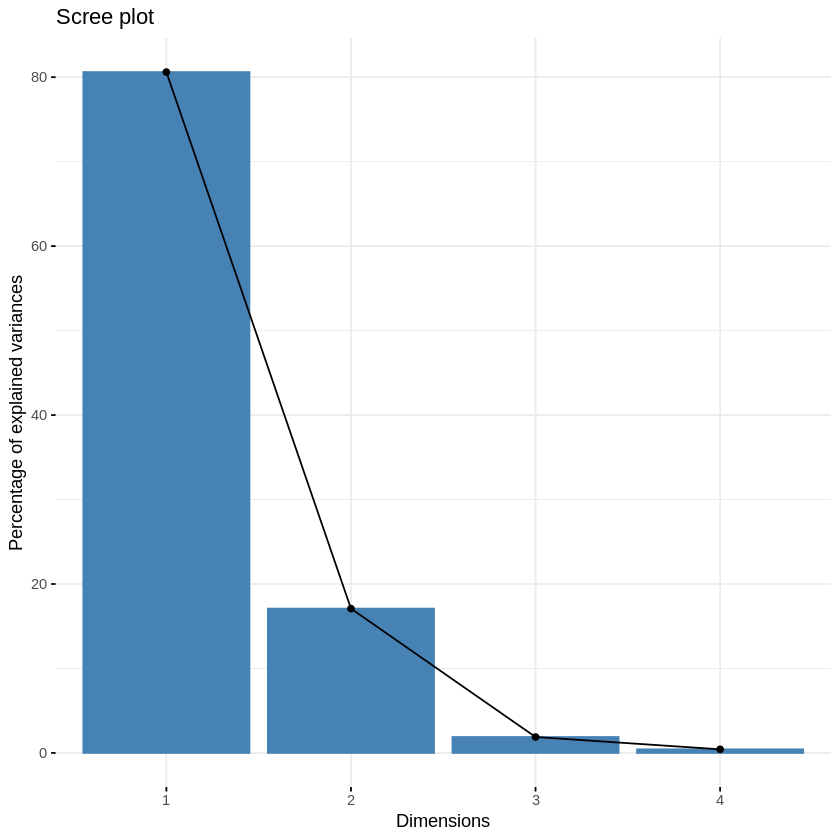

In [ ]:
fviz_screeplot(pca)

На данном графике мы видим, что собстенные числа существенно отличаются друг от друга до третьего включительно. Разница же между третьим и четвёртым собстенными числами мала, график становится пологим.

## Матрицы АГК в наших обозначениях
### F (факторные нагрузки)

In [ ]:
pca$var$coord

,Dim.1,Dim.2,Dim.3,Dim.4
Tar,0.9792345,-0.1684726,-0.043747981,-0.1039366637
Nicotine,0.9716579,-0.1484129,-0.170006934,0.0703722829
Weight,0.6345031,0.7728630,0.009393593,-0.0005316776
CO,0.9584174,-0.1890651,0.210834911,0.0352017185


### Z (координаты индивидов)


In [ ]:
pca$ind$coord

,Dim.1,Dim.2,Dim.3,Dim.4
1,0.34444664,0.04986193,0.158464609,-0.234480471
2,1.63396747,0.90901197,0.286226832,-0.026848912
3,5.58853662,0.33509894,-0.672118111,-0.101565778
4,-1.17754962,-0.08369621,0.087653385,0.150967050
5,-2.45871955,0.63352583,-0.104977050,0.010973808
6,0.47657562,-1.19814014,0.004284482,0.002356987
7,-0.69070522,0.97299566,-0.255152280,0.101659905
8,-0.08977805,-0.55334981,-0.193408826,0.077112538
9,1.10818767,-0.83259319,0.049923442,-0.029668481
10,0.47042830,-1.23318496,0.107939650,0.008983868


### U (собстенные векторы)

In [ ]:
pca$svd$V

0.5453524,-0.2037834,-0.15936742,-0.797286056
0.5411329,-0.1795193,-0.61931011,0.539817595
0.3533656,0.9348503,0.03421947,-0.004078437
0.5337590,-0.2286919,0.76804039,0.270028287


### Попытка объяснения главных компонент:
1. Общее содержание вредных веществ в сигарете
2. Различие между массой сигареты и содержанием в ней вредных веществ
3. Различие между содержанием угарного газа и смол с никотином в сигарете
4.  Различие между содержанием никотина с угарным газом и смол в сигарете

### V (нормированные координаты индивидов)

In [ ]:
pca$svd$U

0.19182822,0.06031268,0.57726313,-1.79867242
0.90998439,1.09953523,1.04268201,-0.20595488
3.11235151,0.40533359,-2.44842685,-0.77909927
-0.65579750,-0.10123842,0.31930832,1.15805068
-1.36930292,0.76630891,-0.38241586,0.08417880
0.26541310,-1.44926287,0.01560774,0.01808017
-0.38466554,1.17692950,-0.92948201,0.77982130
-0.04999893,-0.66932849,-0.70455974,0.59152131
0.61716864,-1.00709955,0.18186371,-0.22758346
0.26198956,-1.49165287,0.39320818,0.06891420
0.21376392,-0.25636489,-0.74835627,0.17252401


### cos2 между старыми и новыми признаками

In [ ]:
pca$var$cos2

,Dim.1,Dim.2,Dim.3,Dim.4
Tar,0.9589003,0.02838303,1.913886e-03,1.080283e-02
Nicotine,0.9441190,0.02202638,2.890236e-02,4.952258e-03
Weight,0.4025942,0.59731727,8.823959e-05,2.826810e-07
CO,0.9185639,0.03574560,4.445136e-02,1.239161e-03


В наших обозначениях это $cos^2\left(\widehat{X_i, V_j}\right) = \dfrac{f_{ij}^2}{\left\|\mathbf{x_i}\right\|^2}$.

### Двумерная диаграмма факторных весов

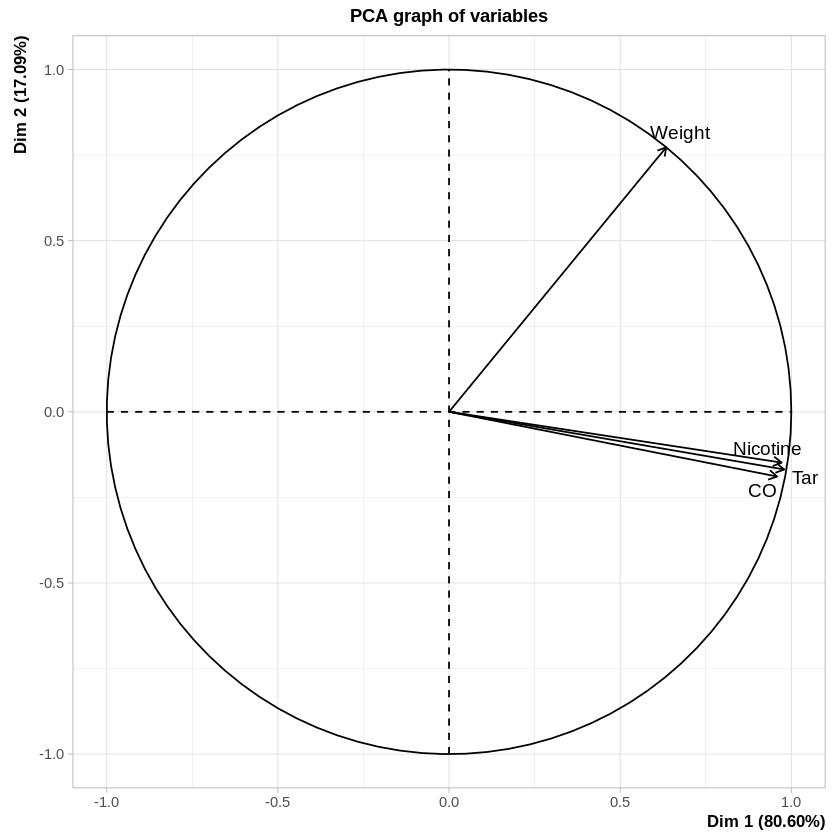

In [ ]:
plot(pca, choix = "var")

Мы видим, что признаки `Nicotine`,`CO` и `Tar` вносят существенный вклад в первую главную компоненту. При этом они сильно коррелируют между собой. `Weight` же довольно слабо коррелирует с остальными признаками и оказывает достаточно большое влияние как на первую, так и на вторую компоненту.

### Biplot

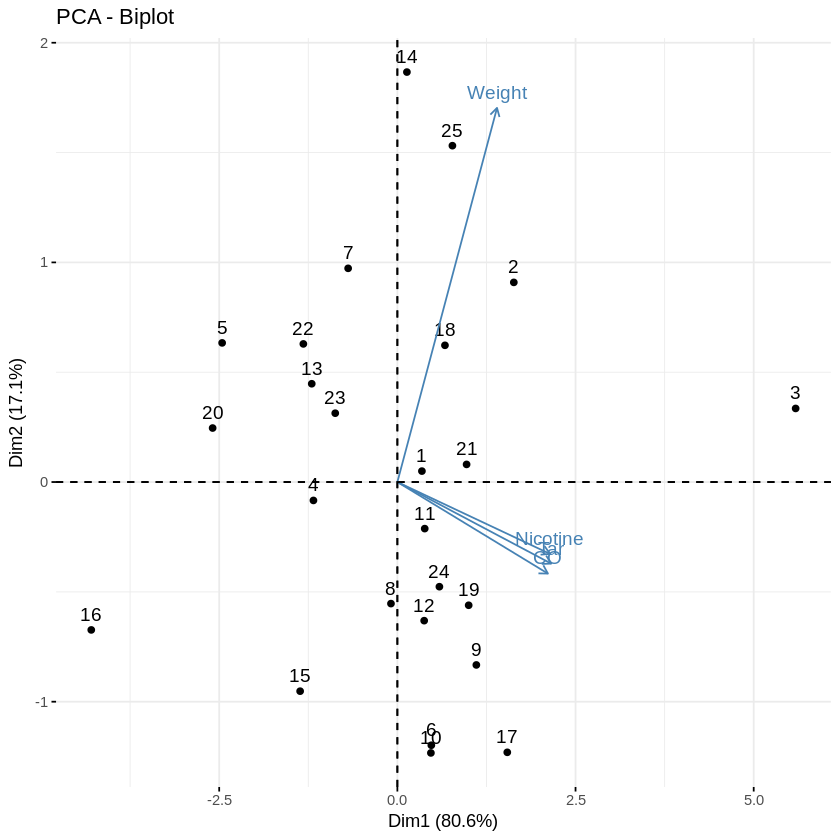

In [ ]:
fviz_pca_biplot(pca)

На графике стрелками обозначены координаты соответствующих старых признаков в главных компонентах $\left(F_{*1},F_{*2}\right)$. Точки отвечают индивидам в координатах первых двух главных компонент, то есть в наших обозначениях $Z_{*1}$ и $Z_{*2}$.

Выделяющиеся наблюдения:
1. Точка в правой части графика, значение первой главной компоненты у которой превышает 5. Она соответствует сигаретам марки "BUll Durham". Действительно, эти сигареты отличаются своей крепостью и соотетственно высоким содержанием вредных веществ.
2. Точка в левой нижней части графика с примерными координатами (-4;-0.7). Она соответствует сигаретам торговой марки "Now". Согласно расположению точки, у данных сигарет содержание вредных веществ ниже, чем в среднем у сигарет, при этом и масса у сигарет ниже средней, но уже не так существенно. Оказывается, что эти сигареты действительно рекламировались как содержащие всего 1 мг смол: "This is more than just low 'tar'. This is ultra-low 'tar'".
3. Две точки в верхней части графика (марки "MultiFilter" и "WinstonLights"). Для них характерно более низкое содержание вредных веществ относительно массы сигареты. Это также объяснимо тем, что это более лёгкие сигареты.

## Удалим выделяющиеся наблюдения

In [ ]:
data_new <- data[-c(3,14,16,25),]
head(data_new)

,Brand,Tar,Nicotine,Weight,CO
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,Alpine,14.1,0.86,0.9853,13.6
2,Benson&Hedges,16.0,1.06,1.0938,16.6
4,CamelLights,8.0,0.67,0.9280,10.2
5,Carlton,4.1,0.40,0.9462,5.4
6,Chesterfield,15.0,1.04,0.8885,15.0
7,GoldenLights,8.8,0.76,1.0267,9.0


In [ ]:
pcan <- FactoMineR::PCA(data_new[-1])
pcan$eig

,eigenvalue,percentage of variance,cumulative percentage of variance
comp 1,2.90712739,72.6781848,72.67818
comp 2,0.98287605,24.5719013,97.25009
comp 3,0.08478475,2.1196188,99.36970
comp 4,0.02521181,0.6302951,100.00000


### Scree plot

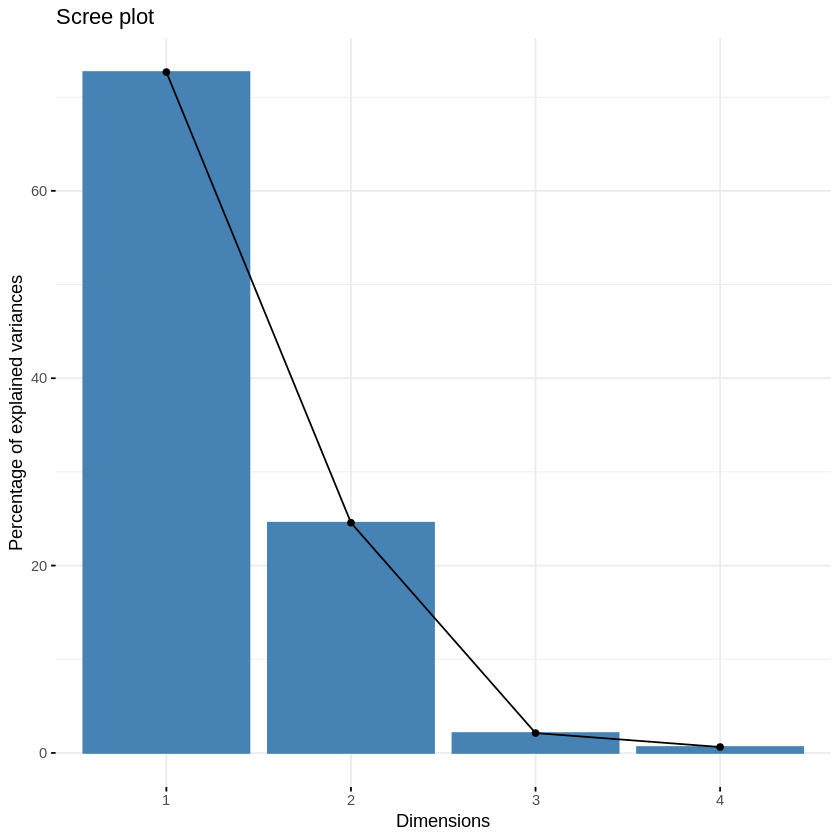

In [ ]:
fviz_screeplot(pcan)

На данном графике мы видим, что собстенные числа существенно отличаются друг от друга до третьего включительно. Разница же между третьим и четвёртым собстенными числами мала, график становится пологим.

## Матрицы АГК в наших обозначениях
### F (факторные нагрузки)

In [ ]:
pcan$var$coord

,Dim.1,Dim.2,Dim.3,Dim.4
Tar,0.9886799,-0.06657014,-0.045576274,0.126504042
Nicotine,0.9721756,-0.04539590,0.225885199,-0.042305644
Weight,0.1618375,0.98681333,-0.001850346,0.002153021
CO,0.9789396,-0.05082448,-0.177988785,-0.086105343


### Z (координаты индивидов)


In [ ]:
head(pcan$ind$coord)

,Dim.1,Dim.2,Dim.3,Dim.4
1,0.5191891,0.4953531,-0.27940763,0.28253428
2,1.9485588,2.3647047,-0.18719413,0.01642996
4,-1.4695658,-0.3639183,-0.11253780,-0.23130490
5,-3.4231740,0.1549949,-0.07958841,0.01217352
6,1.1466354,-1.3443180,0.07338450,0.02365270
7,-1.1440867,1.4251560,0.34760095,0.02500985


### U (собстенные векторы)

In [ ]:
pcan$svd$V

0.57986070,-0.06714754,-0.156523640,0.79671396
0.57018090,-0.04578964,0.775762711,-0.26643810
0.09491771,0.99537249,-0.006354686,0.01355958
0.57414801,-0.05126531,-0.611270958,-0.54228567


В первой компоненте теперь почти не учитывается масса сигареты. Вторая компонента, наоборот, учитывает почти только массу. Третья становится разницей между никотином и угарным газом со смолами, четвёртая --- разницей между смолами и угарным газом с никотином. То есть новая четвёртая главная компонента во многом похожа на старую, однако теперь угарному газу даётся больший вес и разница имеет протиоположный знак.

### V (нормированные координаты индивидов)

In [ ]:
head(pcan$svd$U)

0.3045044,0.4996496,-0.9595760,1.77938195
1.1428296,2.3852150,-0.6428851,0.10347476
-0.8619002,-0.3670748,-0.3864912,-1.45674275
-2.0076913,0.1563393,-0.2733323,0.07666798
0.6725016,-1.3559780,0.2520261,0.14896312
-0.6710068,1.4375172,1.1937739,0.15751039


### cos2 между старыми и новыми признаками

In [ ]:
pca$var$cos2

,Dim.1,Dim.2,Dim.3,Dim.4
Tar,0.9589003,0.02838303,1.913886e-03,1.080283e-02
Nicotine,0.9441190,0.02202638,2.890236e-02,4.952258e-03
Weight,0.4025942,0.59731727,8.823959e-05,2.826810e-07
CO,0.9185639,0.03574560,4.445136e-02,1.239161e-03


### Двумерная диаграмма факторных весов

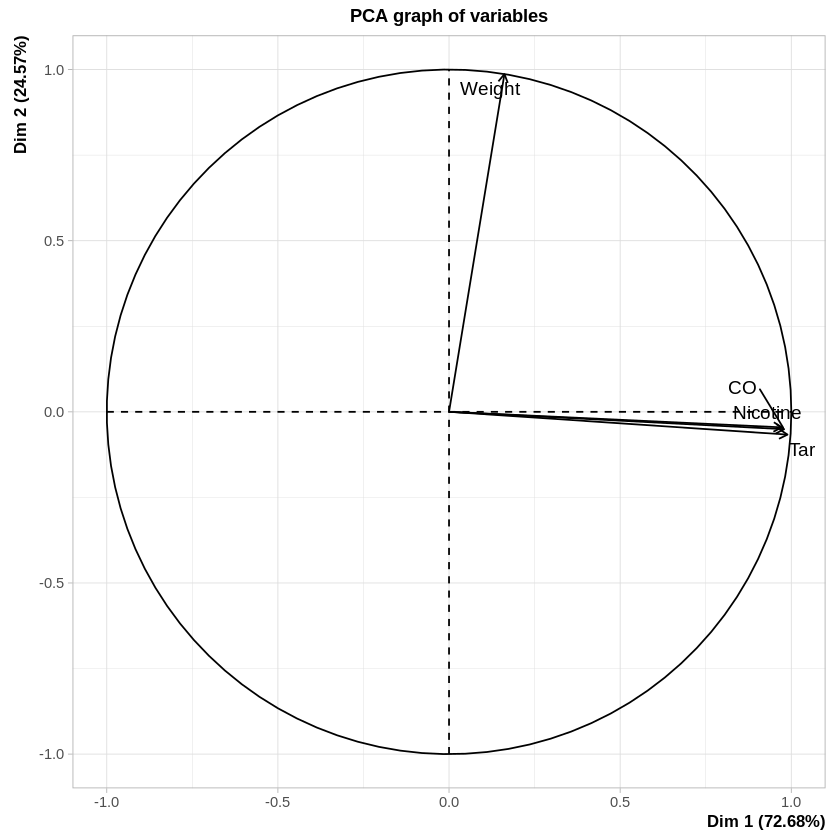

In [ ]:
plot(pcan, choix = "var")

Признак `Weight` почти ортогонален оставшимся трём признакам, поэтому вторую главную компоненту почти полностью формирует он. Остальные три признака вновь сильно коррелируют между собой и в равных долях входят в первую главную компоненту.

### Biplot

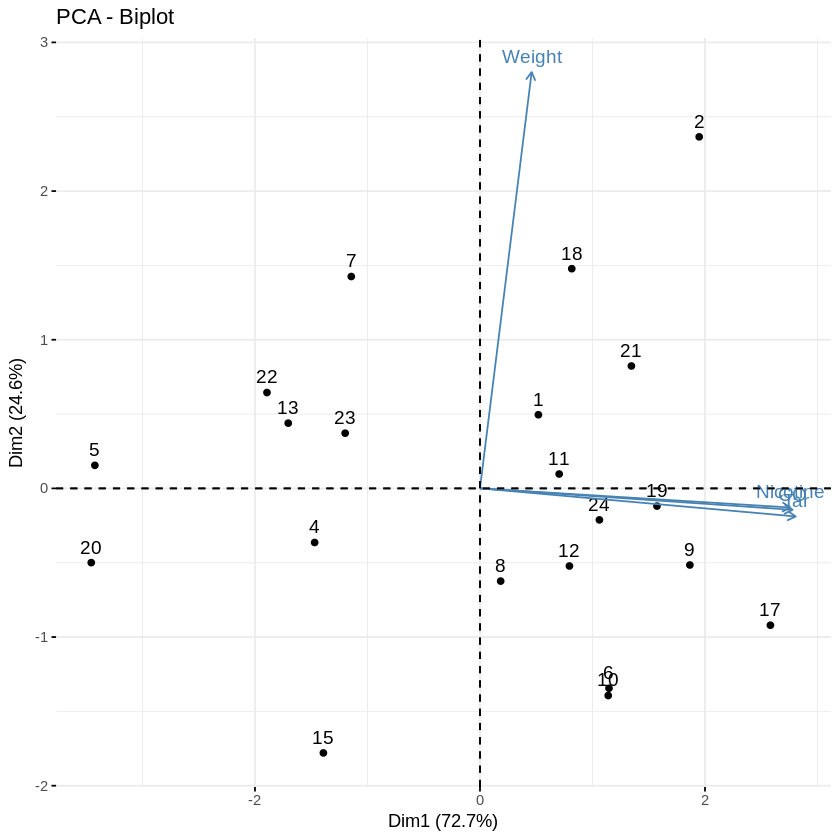

In [ ]:
fviz_pca_biplot(pcan)